# 基础实现

## 1. 交替合并字符串（1768）

`简单`

给你两个字符串 word1 和 word2 。请你从 word1 开始，通过交替添加字母来合并字符串。如果一个字符串比另一个字符串长，就将多出来的字母追加到合并后字符串的末尾。

返回 **合并后的字符串** 。

 

示例 1：
> 输入：`word1 = "abc", word2 = "pqr"`
>
> 输出：`"apbqcr"`
>
> 解释：字符串合并情况如下所示：
>
> word1：  a   b   c
>
> word2：  p   q   r
>
> 合并后：  a p b q c r

示例 2：

> 输入：word1 = "ab", word2 = "pqrs"
>
> 输出："apbqrs"
>
> 解释：注意，word2 比 word1 长，"rs" 需要追加到合并后字符串的末尾。
>
> word1：  a   b
>
> word2：    p   q   r   s
>
> 合并后：  a p b q   r   s

示例 3：

> 输入：word1 = "abcd", word2 = "pq"
>
> 输出："apbqcd"
>
> 解释：注意，word1 比 word2 长，"cd" 需要追加到合并后字符串的末尾。
>
> word1：  a   b   c   d
>
> word2：    p   q
>
> 合并后：  a p b q c   d

### 测试数据

In [2]:
word1 = "abcd"
word2 = "pqr"

### 代码

既然两个字符串长度不一定相同，那么直接截取较长的一段，再用一个指针遍历一次即可。

**注意：** 
1. Python 中的字符串（str）类型是可以直接遍历的（类似于List）。
2. Python 中的 `join` api，用于将序列中的元素以指定的字符连接生成一个新的**字符串**。

In [6]:
class Solution1:
    def mergeAlternately(self, word1: str, word2: str) -> str:
            resWord = []
            l1 = len(word1)
            l2 = len(word2)
            (shortLen, tailStr) = (l1, word2[l1:]) if l1 < l2 else (l2, word1[l2:])
            for index in range(shortLen):
                resWord.append(word1[index])
                resWord.append(word2[index])
            resWord.append(tailStr)
            return "".join(resWord)

solution1 = Solution1()
print(solution1.mergeAlternately(word1, word2))    # 期望输出：apbqcrd

apbqcrd


官方提出的方法是双指针：

该方法占用了更多内存，时间复杂度也没有降低。

In [7]:
class Solution2:
    def mergeAlternately(self, word1: str, word2: str) -> str:
        m, n = len(word1), len(word2)
        i = j = 0

        ans = list()
        while i < m or j < n:
            if i < m:
                ans.append(word1[i])
                i += 1
            if j < n:
                ans.append(word2[j])
                j += 1
        
        return "".join(ans)

solution2 = Solution2()
print(solution2.mergeAlternately(word1, word2))    # 期望输出：apbqcrd

apbqcrd


也可以不截取，而是通过 if 判断，这样更快：

In [9]:
class Solution3:
    def mergeAlternately(self, word1: str, word2: str) -> str:
        p1 = 0
        p2 = 0
        res = ""
        while p1!=len(word1) and p2!=len(word2):
            res+= word1[p1]
            p1+=1
            res+= word2[p2]
            p2+=1
        if p1!=len(word1):
            res+=word1[p1:]
        if p2!=len(word2):
            res += word2[p2:]
        return res

solution3 = Solution3()
print(solution3.mergeAlternately(word1, word2))    # 期望输出：apbqcrd

apbqcrd


## 2. 找不同（389）

给定两个字符串 s 和 t ，它们只包含小写字母。

字符串 t 由字符串 s 随机重排，然后在随机位置添加一个字母。

请找出在 t 中被添加的字母。

 

示例 1：

>输入：s = "abcd", t = "abcde"
>
>输出："e"
>
>解释：'e' 是那个被添加的字母。

示例 2：
>
> 输入：s = "", t = "y"
>
> 输出："y"

### 测试数据

In [10]:
s = "abcdd"
t = "abcddd"

### 代码
直接遍历一遍算ascii码就行了。
用到了 Python 的字符串 api：

1. `ord`：str to ascii
2. `chr`：ascii to str

In [11]:
class Solution1:
    def findTheDifference(self, s: str, t: str) -> str:
        sum_ascii_s = 0
        sum_ascii_t = 0
        for i in range(len(s)):
            sum_ascii_s += ord(s[i])
            sum_ascii_t += ord(t[i])
        sum_ascii_t += ord(t[-1])
        return chr(sum_ascii_t - sum_ascii_s)

solution1 = Solution1()
print(solution1.findTheDifference(s, t))

d


这里其实是使用了 hashTable ，只不过是 Python 内置了，不需要我们自己写。

只要涉及到“查询”并且不需要排序就可以考虑使用 HashTable，当然这里不合适，因为我们不关心其他的字母，只关心多出来的一个，可以实现一下就当复习了：

（这个方法在leetCode跑一遍好像还比ascii的方法更快一些）

In [12]:
class Solution2:
    def findTheDifference(self, s: str, t: str) -> str:
        hashTable = dict()
        raw_sum = 0
        index = 1
        for letter in s:
            if letter not in hashTable:
                hashTable[letter] = index
                hashTable[index] = letter
            raw_sum += hashTable[letter]
            index += 1
        sum = 0
        for letter in t:
            if letter in hashTable:
                sum += hashTable[letter]
            else:
                return letter
        return hashTable[sum - raw_sum]

solution2 = Solution2()
print(solution2.findTheDifference(s, t))

d


## 3. 找出字符串中第一个匹配项的下标（28）

给你两个字符串 haystack 和 needle ，请你在 haystack 字符串中找出 needle 字符串的第一个匹配项的下标（下标从 0 开始）。如果 needle 不是 haystack 的一部分，则返回  -1 。

 

示例 1：

> 输入：haystack = "sadbutsad", needle = "sad"
>
> 输出：0
>
> 解释："sad" 在下标 0 和 6 处匹配。
>
> 第一个匹配项的下标是 0 ，所以返回 0 。

示例 2：

> 输入：haystack = "leetcode", needle = "leeto"
>
> 输出：-1
>
> 解释："leeto" 没有在 "leetcode" 中出现，所以返回 -1 。

### 测试数据

In [16]:
haystack1 = "leetcode"
needle1 = "leeto"

haystack2 = "leetcode"
needle2 = "et"

### 代码
一般的写法是循环一遍做字符串切片，依次比对：

In [17]:
class Solution1:
    def strStr(self, haystack: str, needle: str) -> int:
        n = len(needle)
        for i in range(len(haystack) - n + 1):
            if haystack[i:i+n] == needle:
                return i
        return -1

solution1 = Solution1()
print(solution1.strStr(haystack1, needle1))
print(solution1.strStr(haystack2, needle2))

-1
2


这种查找方法呆呆的，有更好的方法，比如： KMP，BM，Horspool，Sunday，写一个 Sunday 看看（参考于LeetCode）：

作者：Elastic Franklinod7

链接：[LeetCode](https://leetcode.cn/problems/find-the-index-of-the-first-occurrence-in-a-string/solutions/32675/python3-sundayjie-fa-9996-by-tes/)

In [18]:
class Solution2:
    def strStr(self, haystack: str, needle: str) -> int:
    
        # Func: 计算偏移表
        def calShiftMat(st):
            dic = {}
            for i in range(len(st)-1,-1,-1):
                if not dic.get(st[i]):
                    dic[st[i]] = len(st)-i
            dic["ot"] = len(st)+1
            return dic
        
        # 其他情况判断
        if len(needle) > len(haystack):return -1
        if needle=="": return 0
       
        # 偏移表预处理    
        dic = calShiftMat(needle)
        idx = 0
    
        while idx+len(needle) <= len(haystack):
            
            # 待匹配字符串
            str_cut = haystack[idx:idx+len(needle)]
            
            # 判断是否匹配
            if str_cut==needle:
                return idx
            else:
                # 边界处理
                if idx+len(needle) >= len(haystack):
                    return -1
                # 不匹配情况下，根据下一个字符的偏移，移动idx
                cur_c = haystack[idx+len(needle)]
                if dic.get(cur_c):
                    idx += dic[cur_c]
                else:
                    idx += dic["ot"]
            
        
        return -1 if idx+len(needle) >= len(haystack) else idx

solution2 = Solution2()
print(solution2.strStr(haystack1, needle1))
print(solution2.strStr(haystack2, needle2))

-1
2


## 4. 有效的字母异位词（242）

给定两个字符串 s 和 t ，编写一个函数来判断 t 是否是 s 的字母异位词。

注意：若 s 和 t 中每个字符出现的次数都相同，则称 s 和 t 互为字母异位词。

 

示例 1:

> 输入: s = "anagram", t = "nagaram"
>
> 输出: true

示例 2:

> 输入: s = "rat", t = "car"
>
> 输出: false 

进阶: 如果输入字符串包含 unicode 字符怎么办？你能否调整你的解法来应对这种情况

### 测试数据

In [21]:
s = "anagram"
t = "nagaram"

### 代码

哈希表，这里有一个巧妙的思路：加 1 减 1，这样就不需要建立两个表循环两次了。

并且 Python 中的 `Object` 内置了获取可迭代值的 api：

1. `Object.keys()`
2. `Object.values()`

In [25]:
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        if len(s) != len(t):
            return False
        dic = dict()
        for c in s:
            if c not in dic:
                dic[c] = 0
            dic[c] += 1
        for c in t:
            if c not in dic:
                dic[c] = 0
            dic[c] -= 1
        for val in dic.values():
            if val != 0:
                return False
        return True

solution = Solution()
print(solution.isAnagram(s, t))

True


### 进阶

考虑使用 Python 内置的 Uncode 编码对应。

## 5. 重复的子字符串（459）

给定一个非空的字符串 s ，检查是否可以通过由它的一个子串重复多次构成。

示例 1:

> 输入: s = "abab"
>
> 输出: true
>
> 解释: 可由子串 "ab" 重复两次构成。
>
> 示例 2:

> 输入: s = "aba"
>
> 输出: false

示例 3:

> 输入: s = "abcabcabcabc"
>
> 输出: true
>
> 解释: 可由子串 "abc" 重复四次构成。 (或子串 "abcabc" 重复两次构成。)

### 测试数据

In [27]:
s1 = "abcabcabcabc"
s2 = "aba"

### 代码

最简单的思路就是把可能的子字符串一个一个列举出来判断，大多数人喜欢叫它“枚举”。

该方法里用到了 Python 内置的 api `all()`：表示全都 and 一遍。

In [32]:
class Solution1:
    def repeatedSubstringPattern(self, s: str) -> bool:
        n = len(s)
        for i in range(1, n // 2 + 1):
            if n % i == 0:
                if all(s[j] == s[j - i] for j in range(i, n)):
                    return True
        return False

solution1 = Solution1()
print(solution1.repeatedSubstringPattern(s1))
print(solution1.repeatedSubstringPattern(s2))

True
False


枚举肯定是最笨的，因为这个字符串如果是由重复的子字符串构成的，那么它就是有规律的。在处理没有规律的数据时，可以使用枚举，那么对于有规律的数据，要做的就是找规律，然后根据规律设计合适的算法。

下面的“字符串匹配”方法源于 [LeetCode](https://leetcode.cn/problems/repeated-substring-pattern/solutions/386481/zhong-fu-de-zi-zi-fu-chuan-by-leetcode-solution/)：

`str.find(str, beg=0, end=len(string))`
- str -- 指定检索的字符串
- beg -- 开始索引，默认为0。
- end -- 结束索引，默认为字符串的长度。

In [31]:
class Solution2:
    def repeatedSubstringPattern(self, s: str) -> bool:
        return (s + s).find(s, 1) != len(s)

solution2 = Solution2()
print(solution2.repeatedSubstringPattern(s1))
print(solution2.repeatedSubstringPattern(s2))

True
False


在方法二中，我们使用了 Python 自带的字符串查找函数 `find()`。同样我们也可以自己实现这个函数，例如使用比较经典的 KMP 算法。[LeetCode](https://leetcode.cn/problems/repeated-substring-pattern/solutions/386481/zhong-fu-de-zi-zi-fu-chuan-by-leetcode-solution/)

需要注意以下几点：

- KMP 算法虽然有着良好的理论时间复杂度上限，但大部分语言自带的字符串查找函数并不是用 KMP 算法实现的。这是因为在实现 API 时，我们需要在平均时间复杂度和最坏时间复杂度二者之间权衡。普通的暴力匹配算法以及优化的 BM 算法拥有比 KMP 算法更为优秀的平均时间复杂度；

- 学习 KMP 算法时，一定要理解其本质。如果放弃阅读晦涩难懂的材料（即使大部分讲解 KMP 算法的材料都包含大量的图，但图毕竟只能描述特殊而非一般情况）而是直接去阅读代码，是永远无法学会 KMP 算法的。读者甚至无法理解 KMP 算法关键代码中的任意一行。

由于本题就是在一个字符串中查询另一个字符串是否出现，可以直接套用 KMP 算法。因此这里对 KMP 算法本身不再赘述。读者可以自行查阅资料进行学习。这里留了三个思考题，读者可以在学习完毕后尝试回答这三个问题，检验自己的学习成果：

- 设查询串的的长度为 $n$，模式串的长度为 $m$，我们需要判断模式串是否为查询串的子串。那么使用 KMP 算法处理该问题时的时间复杂度是多少？在分析时间复杂度时使用了哪一种分析方法？

- 如果有多个查询串，平均长度为 $n$，数量为 $k$，那么总时间复杂度是多少？

- 在 KMP 算法中，对于模式串，我们需要预处理出一个 $\textit{fail}$ 数组（有时也称为 $\textit{next}$ 数组、$\pi$ 数组等）。这个数组到底表示了什么？

### KMP 算法

引用于：[如何更好地理解和掌握 KMP 算法? - 阮行止的回答 - 知乎](https://www.zhihu.com/question/21923021/answer/1032665486)

KMP算法是一种字符串匹配算法，可以在 O(n+m) 的时间复杂度内实现两个字符串的匹配。

暴力匹配算法，叫做 Brute Force （蛮力）算法：
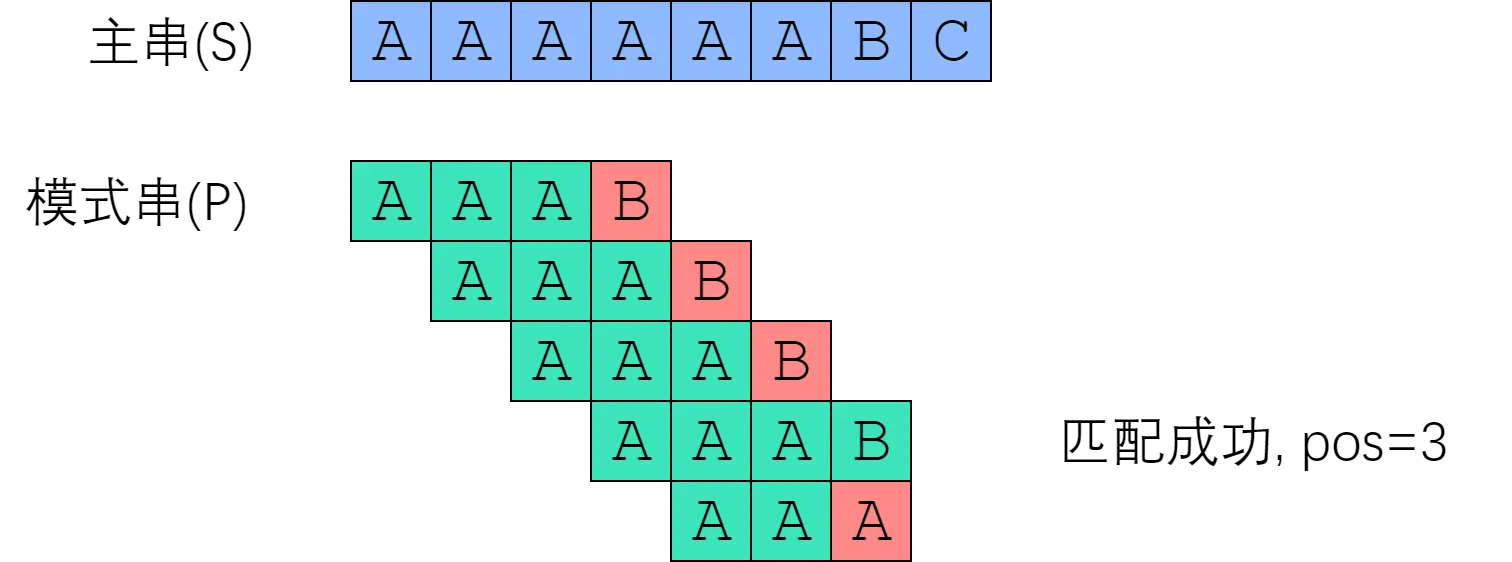

In [33]:
def bruteForce(S, Pattern):
    for i in range(len(S) - len(Pattern) + 1):
        if S[i : i+ len(Pattern)] == P:
            print(i)

我们成功实现了 Brute-Force 算法。现在，我们需要对它的时间复杂度做一点讨论。按照惯例，记 $n = |S|$ 为串 S 的长度，$m = |P|$ 为串 P 的长度。　　

考虑“字符串比较”这个小任务的复杂度。最坏情况发生在：两个字符串唯一的差别在最后一个字符。这种情况下，字符串比较必须走完整个字符串，才能给出结果，因此复杂度是 O(len) 的。　　　　

由此，不难想到 Brute-Force 算法所面对的最坏情况：主串形如“AAAAAAAAAAA...B”，而模式串形如“AAAAA...B”。每次字符串比较都需要付出 $|P|$ 次字符比较的代价，总共需要比较 $|S| - |P| + 1$ 次，因此总时间复杂度是  $O(|P|⋅(|S|−|P|+1))$ . 考虑到主串一般比模式串长很多，故 Brute-Force 的复杂度是 $O(|P|⋅|S|)$ ，也就是 $O(nm)$ 的。这太慢了！

### Brute-Force 的改进思路

Bruter-Force 最坏的情况如下图所示：

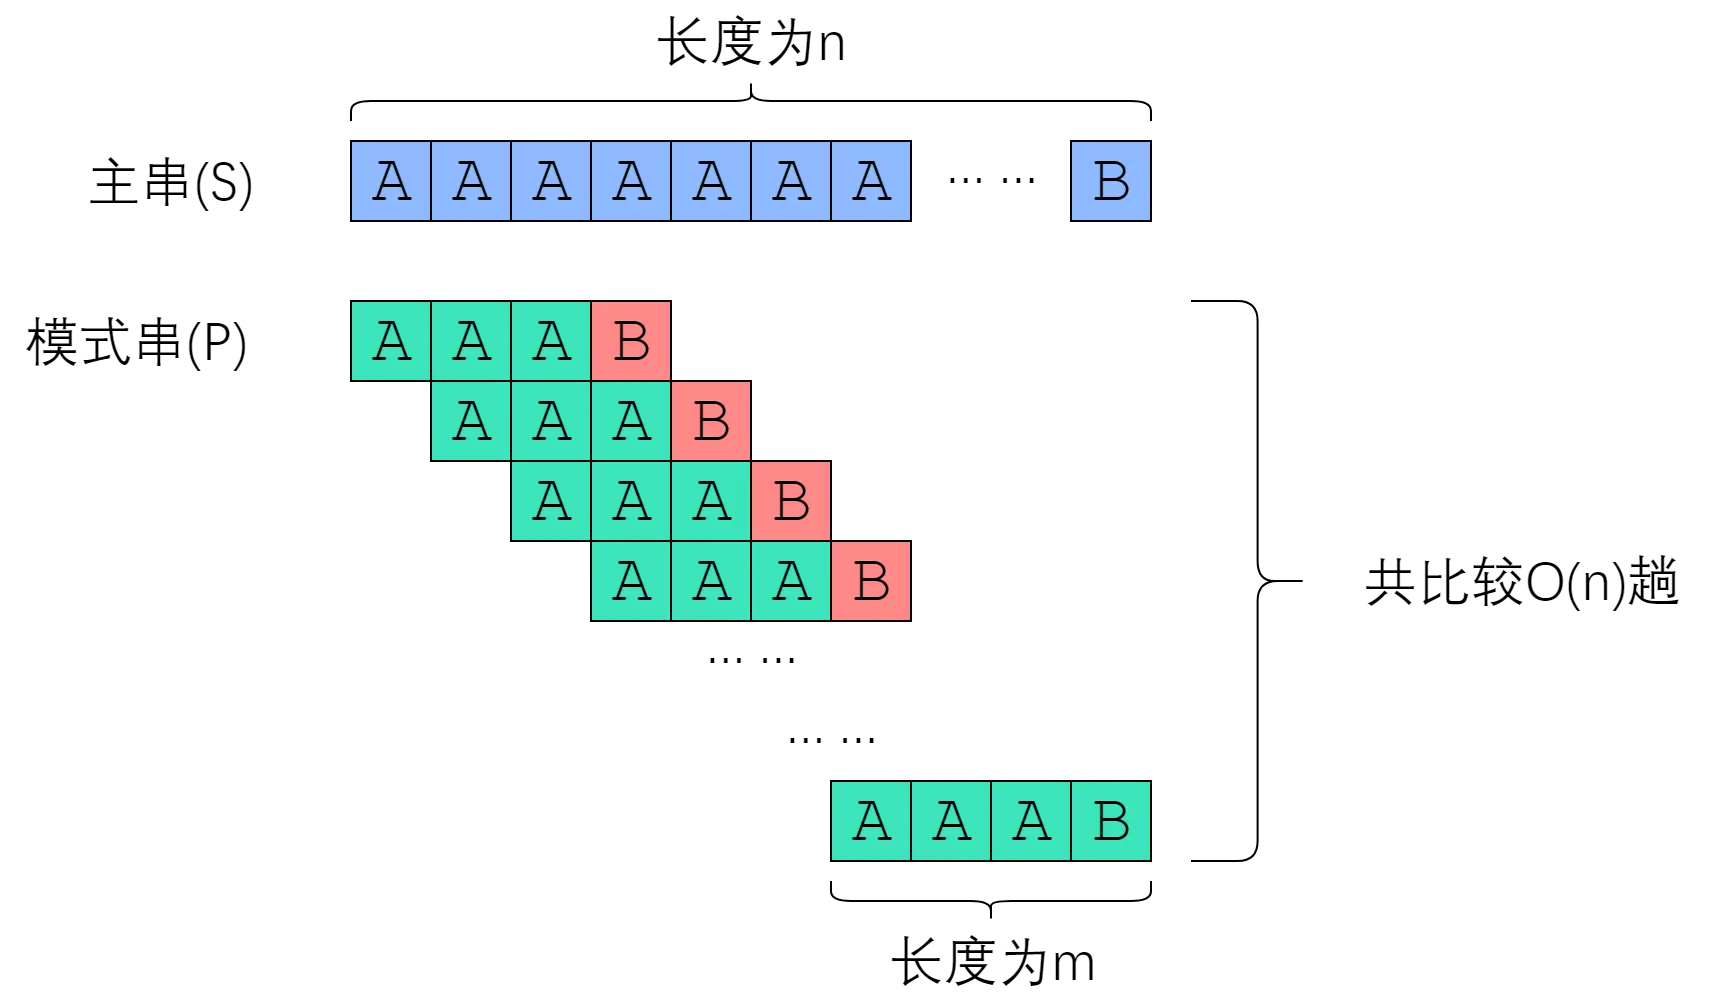

我们很难降低字符串比较的复杂度（因为比较两个字符串，真的只能逐个比较字符）。因此，我们考虑**降低比较的次数**。如果比较的趟数能降到足够低，那么总的复杂度也将会下降很多。　　

要优化一个算法，首先要回答的问题是“我手上有什么信息？”　我们手上的信息是否足够、是否有效，决定了我们能把算法优化到何种程度。请记住：**尽可能利用残余的信息**，是KMP算法的思想所在。

在 Brute-Force 中，如果从 $S[i]$ 开始的那一趟比较失败了，算法会直接开始尝试从 $S[i+1]$ 开始比较。这种行为，属于典型的“没有从之前的错误中学到东西”。我们应当注意到，一次失败的匹配，会给我们提供宝贵的信息——如果 $S[i : i+len(P)]$ 与 $P$ 的匹配是在第 $r$ 个位置失败的，那么从 $S[i]$ 开始的 $(r-1)$ 个连续字符，一定与 $P$ 的前 $(r-1)$ 个字符一模一样！

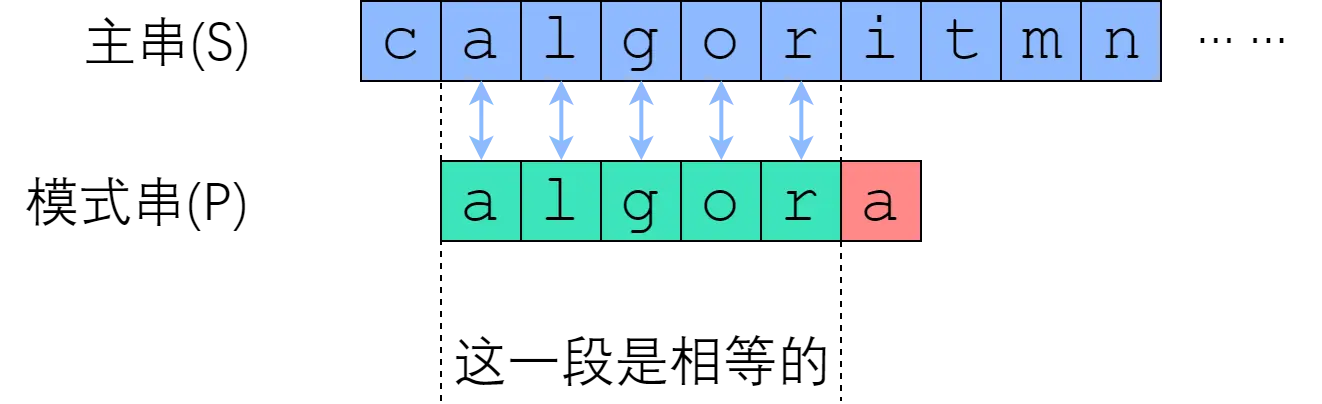

如果我们跳过那些绝不可能成功的字符串比较，则可以希望复杂度降低到能接受的范围。

那么，哪些字符串比较是不可能成功的？来看一个例子。已知信息如下：
- 模式串 P = "abcabd".
- 和主串从 $S[0]$ 开始匹配时，在 $P[5]$ 处失配。

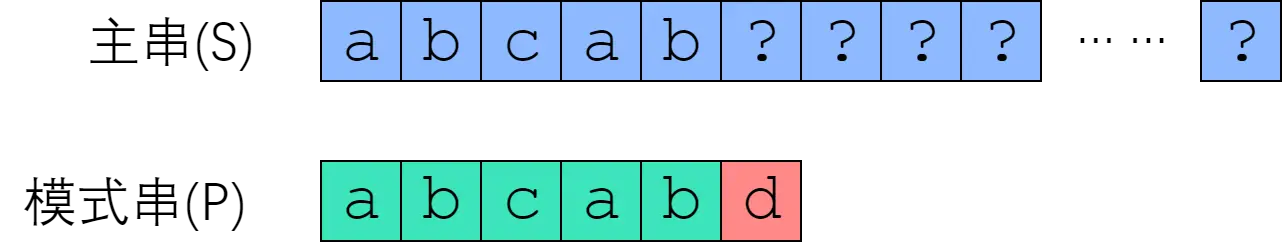

首先，利用上一节的结论。既然是在 $P[5]$ 失配的，那么说明 $S[0:5]$ 等于 $P[0:5]$，即"abcab". 现在我们来考虑：从 $S[1]、S[2]、S[3]$ 开始的匹配尝试，有没有可能成功？　　

从 $S[1]$ 开始肯定没办法成功，因为 $S[1] = P[1] = 'b'$，和 $P[0]$ 并不相等。从 $S[2]$ 开始也是没戏的，因为 $S[2] = P[2] = 'c'$，并不等于 $P[0]$。 但是从 $S[3]$ 开始是有可能成功的——至少按照已知的信息，我们推不出矛盾。

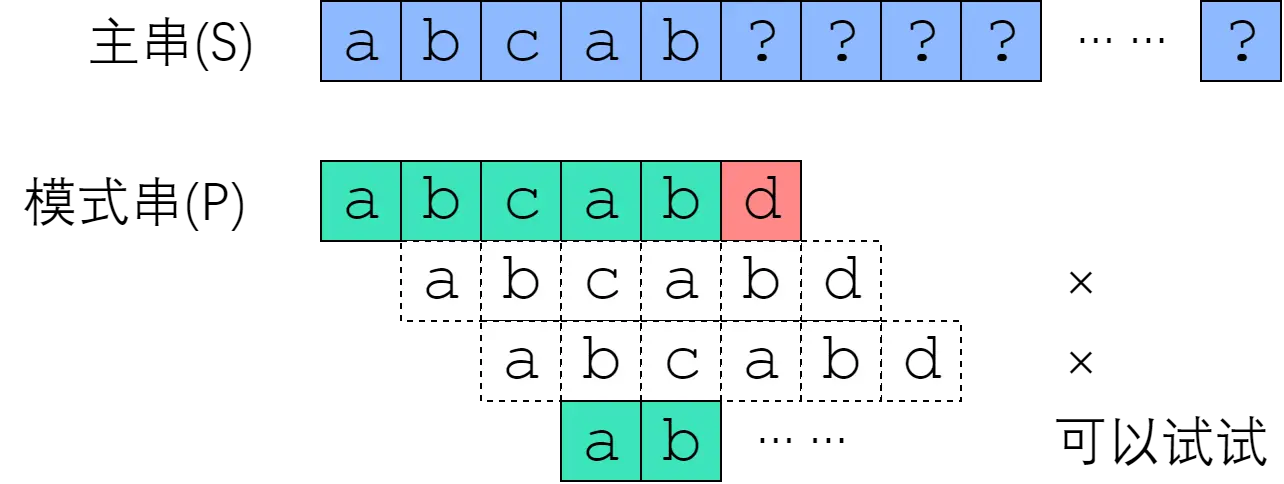

带着“跳过不可能成功的尝试”的思想，我们来看next数组。

### Next 数组

next 数组是对于模式串而言的。P 的 next 数组定义为：$next[i]$ 表示 $P[0] ~ P[i]$ 这一个子串，使得 前k个字符恰等于后k个字符的最大的k。特别地，k不能取 i+1（因为这个子串一共才 i+1 个字符，自己肯定与自己相等，就没有意义了）。

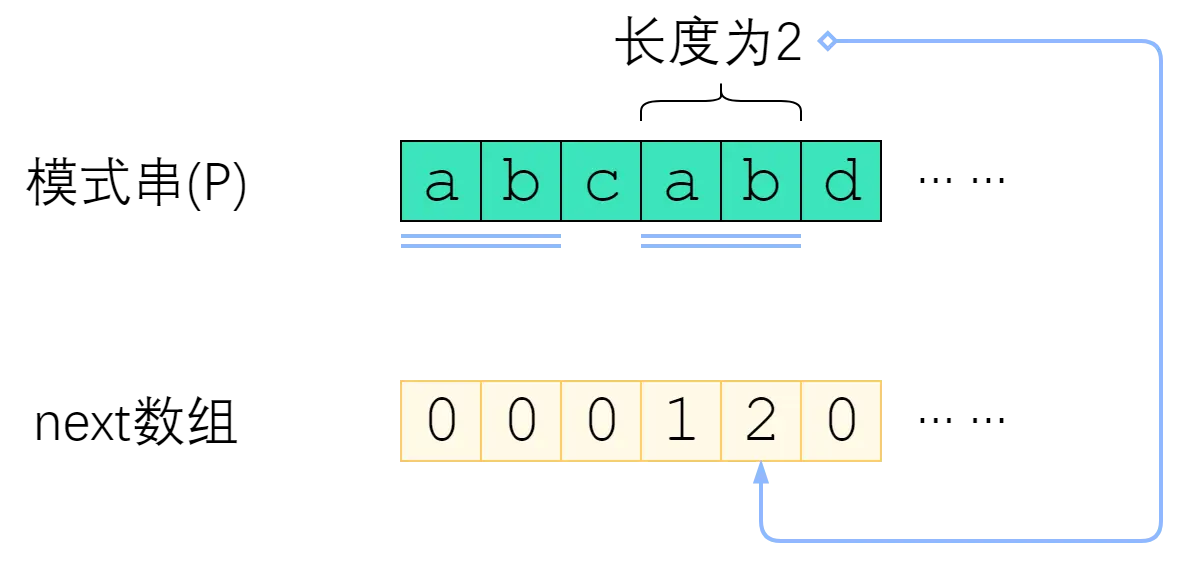

上图给出了一个例子。$P="abcabd"$ 时，$next[4]=2$，这是因为 $P[0] ~ P[4]$ 这个子串是 "abcab"，前两个字符与后两个字符相等，因此$next[4]$ 取2. 而 $next[5]=0$，是因为"abcabd"找不到前缀与后缀相同，因此只能取0。

如果把模式串视为一把标尺，在主串上移动，那么 Brute-Force 就是每次失配之后只右移一位；改进算法则是每次失配之后，移很多位，跳过那些不可能匹配成功的位置。但是该如何确定要移多少位呢？

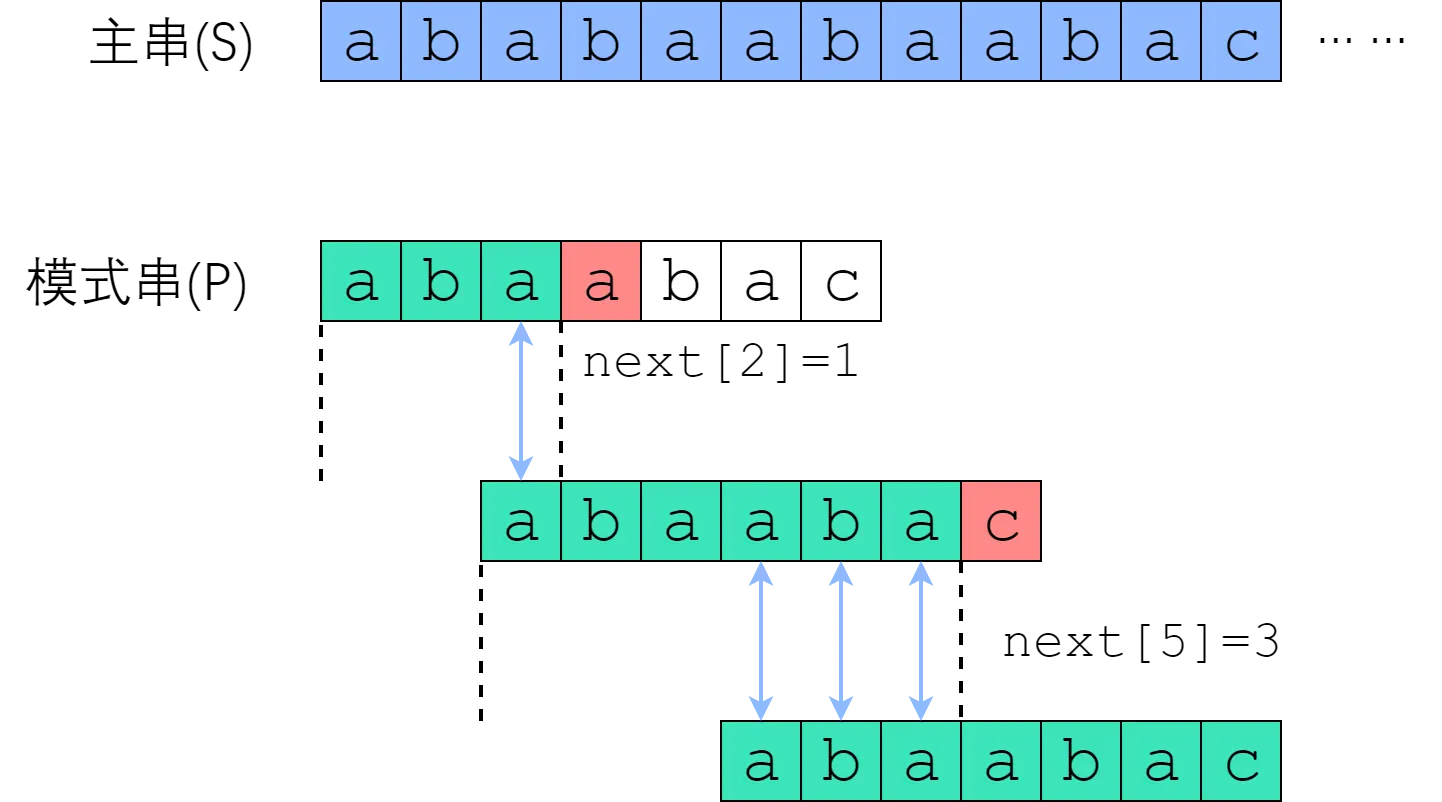

在 S[0] 尝试匹配，失配于 S[3] <=> P[3] 之后，我们直接把模式串往右移了两位，让 S[3] 对准 P[1]。（为什么移动两位？因为在 $S[3]$ 失配，对应于 $P[3]$ ，那么只学到了 $P[0] ~ P[2]$ 的匹配信息，就只能用 $next[2]$）

接着继续匹配，失配于 S[8] <=> P[6], 接下来我们把 P 往右平移了三位，把 S[8] 对准 P[3]。（同理，只学到了 $P[0] ~ P[5]$ 的匹配信息，就用 $next[5]$ ，为啥不用 $next[2]$ ？因为已经学到 $next[5]$ 了，不要浪费信息）此后继续匹配直到成功。



### 建立 next 数组

朴素方法：

In [5]:
def getNext(x):
    for i in range(x, 0, -1):
        if pattern[0 : i] == pattern[x - i + 1 : x + 1]:
            return i
    return 0
pattern = "abaaba"
nxt = [getNext(x) for x in range(len(pattern))]
print(nxt)

[0, 0, 1, 1, 2, 3]


快速方法：快速构建next数组，是KMP算法的精髓所在，核心思想是“**P自己与自己做匹配**”。

为什么这样说呢？回顾next数组的完整定义：

- 定义 “k-前缀” 为一个字符串的前 k 个字符； “k-后缀” 为一个字符串的后 k 个字符。k 必须小于字符串长度。
- $next[x]$ 定义为： $P[0]$~ $P[x]$ 这一段字符串，使得k-前缀恰等于k-后缀的最大的k。

这个定义中，不知不觉地就包含了一个匹配——前缀和后缀相等。接下来，我们考虑采用递推的方式求出next数组。如果 $next[0], next[1], ... next[x-1]$ 均已知，那么如何求出 $next[x]$ 呢？　　

来分情况讨论。首先，已经知道了 $next[x-1]$（以下记为now），如果 $P[x]$ 与 $P[now]$ 一样，那最长相等前后缀的长度就可以扩展一位，很明显 $next[x] = now + 1$ 。 图示如下：

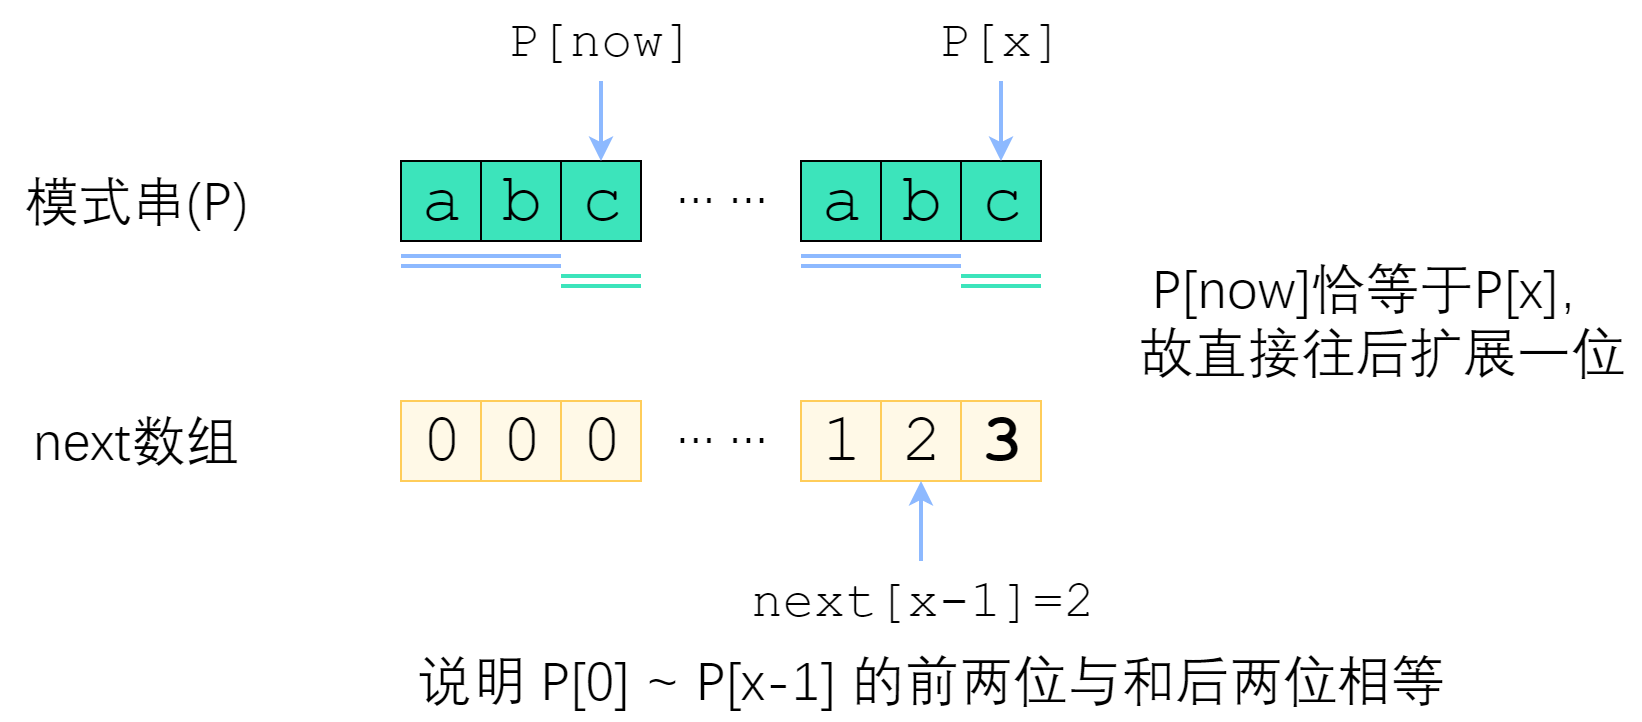

刚刚解决了 $P[x] = P[now]$ 的情况。那如果 $P[x]$ 与 $P[now]$ 不一样，又该怎么办？

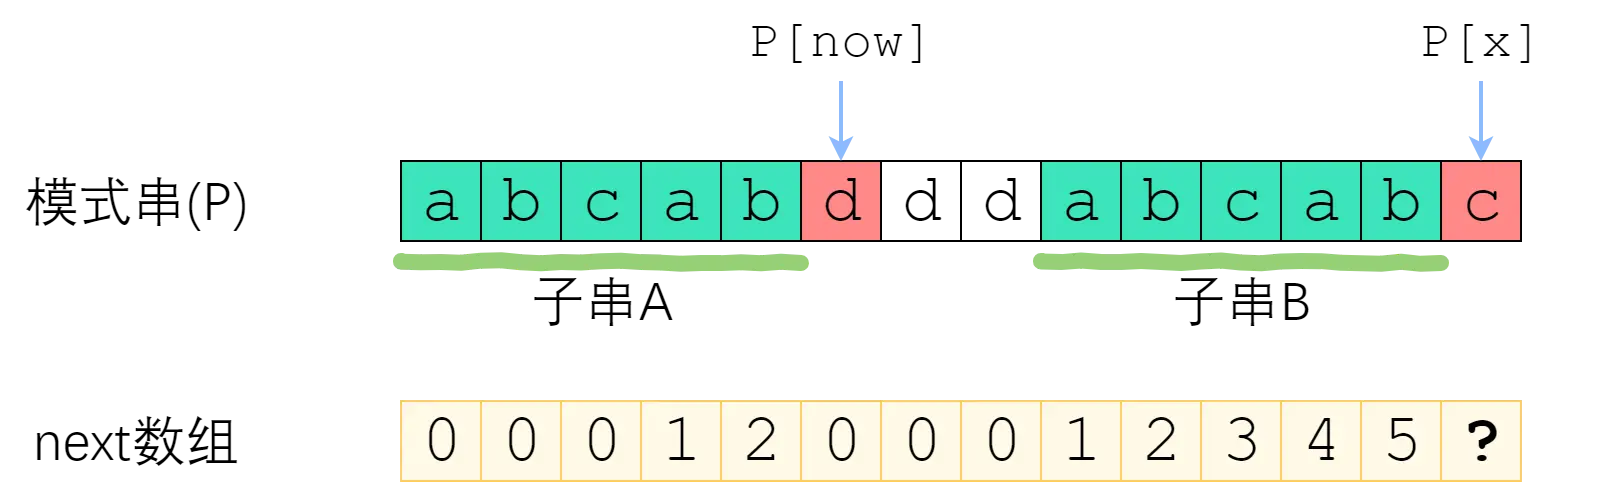

如图。长度为 now 的子串 A 和子串 B 是 $P[0]$~$P[x-1]$ 中最长的公共前后缀。可惜 A 右边的字符和 B 右边的那个字符不相等，$next[x]$不能改成 now+1 了。因此，我们应该缩短这个now，把它改成小一点的值，再来试试 $P[x]$ 是否等于 $P[now]$.　　

now 该缩小到多少呢？显然，我们不想让now缩小太多。因此我们决定，在保持“$P[0]$\~$P[x-1]$ 的now-前缀仍然等于now-后缀”的前提下，让这个新的now尽可能大一点。 $P[0]$\~$P[x-1]$ 的公共前后缀，前缀一定落在串A里面、后缀一定落在串B里面。换句话讲：接下来now应该改成：使得 A的k-前缀等于B的k-后缀 的最大的k.　　

您应该已经注意到了一个非常强的性质——串A和串B是相同的！B的后缀等于A的后缀！因此，使得A的k-前缀等于B的k-后缀的最大的k，其实就是串A的最长公共前后缀的长度 —— $next[now-1]$！

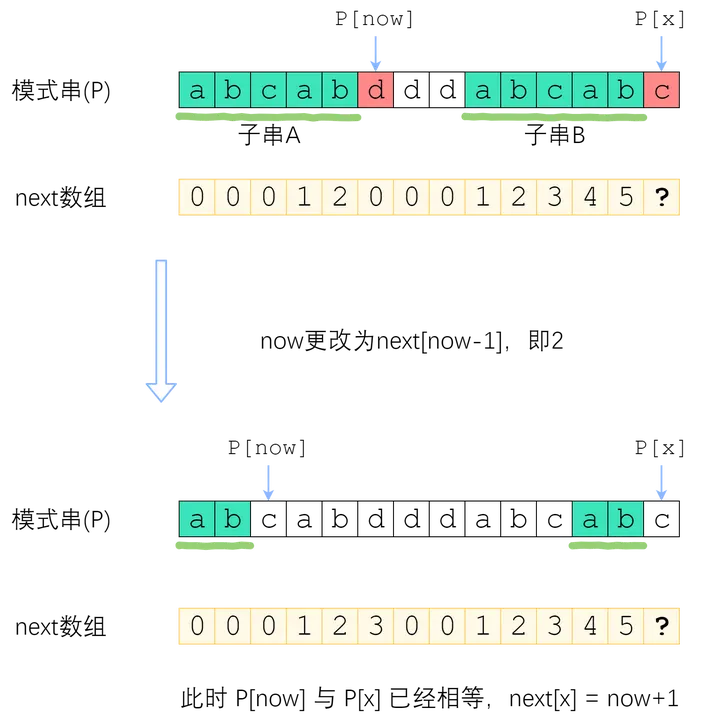

来看上面的例子。当 $P[now]$与 $P[x]$ 不相等的时候，我们需要缩小now——把now变成 $next[now-1]$，直到 $P[now]=P[x]$ 为止。$P[now]=P[x]$ 时，就可以直接向右扩展了。

代码实现如下：

In [16]:
p = "abcabcabcabcd"
nxt = []

def buildNxt():
    nxt.append(0)
    x = 1
    now = 0

    while x < len(p):
        if p[now] == p[x]:
            now += 1
            x+= 1
            nxt.append(now)
        elif now:
            now = nxt[now - 1]
        else:
            nxt.append(0)
            x += 1

buildNxt()
print(nxt)

[0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0]


### KMP 搜索算法实现

In [14]:
class KMP:
    def __init__(self, p):
        self.p = p
        self.nxt = self.next()
    def next(self):
        nxt = [0]
        now = 0
        position = 1
        while position < len(self.p):
            if self.p[now] == self.p[position]:
                now += 1
                position += 1
                nxt.append(now)
            elif now:
                now = nxt[now - 1]
            else:
                nxt.append(0)
                position += 1
        return nxt
    def search(self, s):
        tar = 0
        pos = 0
        while tar < len(s):
            if s[tar] == self.p[pos]:
                tar += 1
                pos += 1
            elif pos:
                pos = self.nxt[pos - 1]
            else:
                tar += 1
            
            if pos == len(self.p):
                return tar - pos + 1

In [15]:
kmp = KMP("abcabcd")
kmp.search("abcabcabcd")

4

## 6. 移动 0 （283）

给定一个数组 nums，编写一个函数将所有 0 移动到数组的末尾，同时保持非零元素的相对顺序。

请注意 ，必须在不复制数组的情况下原地对数组进行操作。

 

示例 1:

> 输入: nums = [0,1,0,3,12]
>
> 输出: [1,3,12,0,0]

示例 2:

> 输入: nums = [0]
>
> 输出: [0]

### 测试数据

In [29]:
nums = [0, 1, 0, 0, 3, 12]

### 代码
初始思路，遍历一遍即可：

In [30]:
class Solution1:
    def moveZeroes(self, nums) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        index = 0
        zero_num = 0
        while index < len(nums):
            if nums[index] == 0:
                    zero_num += 1
                    index += 1
            if zero_num:
                if nums[index] != 0:
                    nums[index - zero_num] = nums[index]
                    nums[index - zero_num + 1 : index + 1] = [0] * zero_num
                    index = index - zero_num + 1
                    zero_num = 0
            if index == len(nums) - 1:
                break

solution1 = Solution1()
solution1.moveZeroes(nums)
print(nums)

[1, 3, 12, 0, 0, 0]


这是狗屎算法，太慢了，处理一次以后又要重新遍历，如果数组里面 0 很多就寄了。

双指针，统计 0 出现的次数：

In [35]:
# 链接：https://leetcode.cn/problems/move-zeroes/solutions/90229/dong-hua-yan-shi-283yi-dong-ling-by-wang_ni_ma/
# 来源：力扣（LeetCode）
class Solution2(object):
	def moveZeroes(self, nums):
		"""
		:type nums: List[int]
		:rtype: None Do not return anything, modify nums in-place instead.
		"""
		if not nums:
			return 0
		# 第一次遍历的时候，j指针记录非0的个数，只要是非0的统统都赋给nums[j]	
		j = 0
		for i in range(len(nums)):
			if nums[i]:
				nums[j] = nums[i]
				j += 1
		# 非0元素统计完了，剩下的都是0了
		# 所以第二次遍历把末尾的元素都赋为0即可
		for i in range(j,len(nums)):
			nums[i] = 0

nums = [0, 1, 0, 0, 3, 12]
solution2 = Solution2()
solution2.moveZeroes(nums)
print(nums)

[1, 3, 12, 0, 0, 0]


借助快速排序的思路：

In [37]:
class Solution3(object):
	def moveZeroes(self, nums):
		"""
		:type nums: List[int]
		:rtype: None Do not return anything, modify nums in-place instead.
		"""
		if not nums:
			return 0
		# 两个指针i和j
		j = 0
		for i in range(len(nums)):
			# 当前元素!=0，就把其交换到左边，等于0的交换到右边
			if nums[i]:
				nums[j],nums[i] = nums[i],nums[j]
				j += 1


nums = [0, 1, 0, 0, 3, 12]
solution3 = Solution3()
solution3.moveZeroes(nums)
print(nums)

[1, 3, 12, 0, 0, 0]


总结：需要熟悉指针用法。

## 7. 加 1 （66）

给定一个由 整数 组成的 非空 数组所表示的非负整数，在该数的基础上加一。

最高位数字存放在数组的首位， 数组中每个元素只存储单个数字。

你可以假设除了整数 0 之外，这个整数不会以零开头。

 

示例 1：

> 输入：digits = [1,2,3]
>
> 输出：[1,2,4]
>
> 解释：输入数组表示数字 123。

示例 2：

> 输入：digits = [4,3,2,1]
>
> 输出：[4,3,2,2]
>
> 解释：输入数组表示数字 4321。

示例 3：

> 输入：digits = [0]
>
> 输出：[1]

### 测试数据

In [38]:
digits = [1,2,3,9]

### 代码

初始想法直接转换成整数，加一以后再转换回列表，这个方法比较省事，但是要换来换去，效率不高，还使用了 `map()`：
- `map(function, iterable)`

In [40]:
class Solution1:
    def plusOne(self, digits):
        a = ''
        for i in digits:
            a += str(i)
        a = int(a) + 1
        return list(map(int, str(a)))

也可以模拟进位：

In [42]:
class Solution2:
    def plusOne(self, digits):
        cur = 1
        for i in range(len(digits) - 1, -1, -1):
            cur += digits[i]
            digits[i] = cur % 10
            cur //= 10
            if cur == 0:
                return digits
        return digits if not cur else [cur] + digits

## 8. 数组元素积的符号（1822）

已知函数 signFunc(x) 将会根据 x 的正负返回特定值：

- 如果 x 是正数，返回 1 。
- 如果 x 是负数，返回 -1 。
- 如果 x 是等于 0 ，返回 0 。

给你一个整数数组 nums 。令 product 为数组 nums 中所有元素值的乘积。

返回 signFunc(product) 。

### 代码

太简单，最喜欢的一题。

In [43]:
class Solution:
    def arraySign(self, nums) -> int:
        a = True
        for i in nums:
            if i < 0:
                a = not a
            elif i == 0:
                return 0
        if a is True:
            return 1
        else:
            return -1

## 9. 判断能否形成等差数列（1502）

给你一个数字数组 arr 。

如果一个数列中，任意相邻两项的差总等于同一个常数，那么这个数列就称为 等差数列 。

如果可以重新排列数组形成等差数列，请返回 true ；否则，返回 false 。

 

示例 1：

> 输入：arr = [3,5,1]
>
> 输出：true
>
> 解释：对数组重新排序得到 [1,3,5] 或者 [5,3,1] ，任意相邻两项的差分别为 2 或 -2 ，可以形成等差数列。

示例 2：

> 输入：arr = [1,2,4]
>
> 输出：false

解释：无法通过重新排序得到等差数列。

### 代码

排序以后用定义判断就行。

In [45]:
class Solution:
    def canMakeArithmeticProgression(self, arr) -> bool:
        arr.sort()
        diff = arr[0] - arr[1]
        for i in range(len(arr) - 1):
            if arr[i] - arr[i + 1] != diff:
                return False
        return True

## 10. 单调数列（896）

如果数组是单调递增或单调递减的，那么它是 单调 的。

如果对于所有 i <= j，nums[i] <= nums[j]，那么数组 nums 是单调递增的。 

如果对于所有 i <= j，nums[i]> = nums[j]，那么数组 nums 是单调递减的。

当给定的数组 nums 是单调数组时返回 true，否则返回 false。

### 代码

迭代即可。

In [ ]:
class Solution:
    def isMonotonic(self, nums: List[int]) -> bool:
        n = len(nums)
        ascend = 0
        descend = 0
        for i in range(n-1):
            if nums[i] < nums[i+1]:
                ascend += 1
            if nums[i] > nums[i+1]:
                descend += 1
            if ascend and descend:
                return False
        return True

## 11. 罗马数字转整数（13）

罗马数字包含以下七种字符: I， V， X， L，C，D 和 M。

字符          数值
I             1
V             5
X             10
L             50
C             100
D             500
M             1000

例如， 罗马数字 2 写做 II ，即为两个并列的 1 。12 写做 XII ，即为 X + II 。 27 写做  XXVII, 即为 XX + V + II 。

通常情况下，罗马数字中小的数字在大的数字的右边。但也存在特例，例如 4 不写做 IIII，而是 IV。数字 1 在数字 5 的左边，所表示的数等于大数 5 减小数 1 得到的数值 4 。同样地，数字 9 表示为 IX。这个特殊的规则只适用于以下六种情况：

I 可以放在 V (5) 和 X (10) 的左边，来表示 4 和 9。

X 可以放在 L (50) 和 C (100) 的左边，来表示 40 和 90。 

C 可以放在 D (500) 和 M (1000) 的左边，来表示 400 和 900。

给定一个罗马数字，将其转换成整数。


 

示例 1:

> 输入: s = "III"
>
> 输出: 3

示例 2:

> 输入: s = "IV"
>
> 输出: 4

示例 3:

> 输入: s = "IX"
>
> 输出: 9

示例 4:

> 输入: s = "LVIII"
>
> 输出: 58
>
> 解释: L = 50, V= 5, III = 3.

示例 5:

> 输入: s = "MCMXCIV"
>
> 输出: 1994
>
> 解释: M = 1000, CM = 900, XC = 90, IV = 4.

### 代码

找规律。

In [46]:
class Solution:
    def romanToInt(self, s: str) -> int:
        Roman2Int = {'I':1,'V':5,'X':10,'L':50,'C':100,'D':500,'M':1000}
        Int = 0
        n = len(s)

        for index in range(n - 1):
            if Roman2Int[s[index]] < Roman2Int[s[index + 1]]:
                Int -= Roman2Int[s[index]]
            else:
                Int += Roman2Int[s[index]]

        return Int + Roman2Int[s[-1]]